In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
par_rag = 0.999

<center>

# <span style="color:blue;"> Dimensioni dei dischi </span>

<center>

Per la seguente analisi ho preso in considerazione il disco circum-secondario in un sistema con un rapporto di masse stellari 1:3. I parametri adimensionali $\alpha$ presi in considerazione sono:
$$\alpha \in \{1\cdot 10^{-4},\,5\cdot 10^{-4},\,1\cdot 10^{-3}\}$$
I rispettivi aspect-ratio sono:
$$\frac{h}{r}\in\{0.15811,\,0.07071,\,0.05\}$$ 

### Output finali

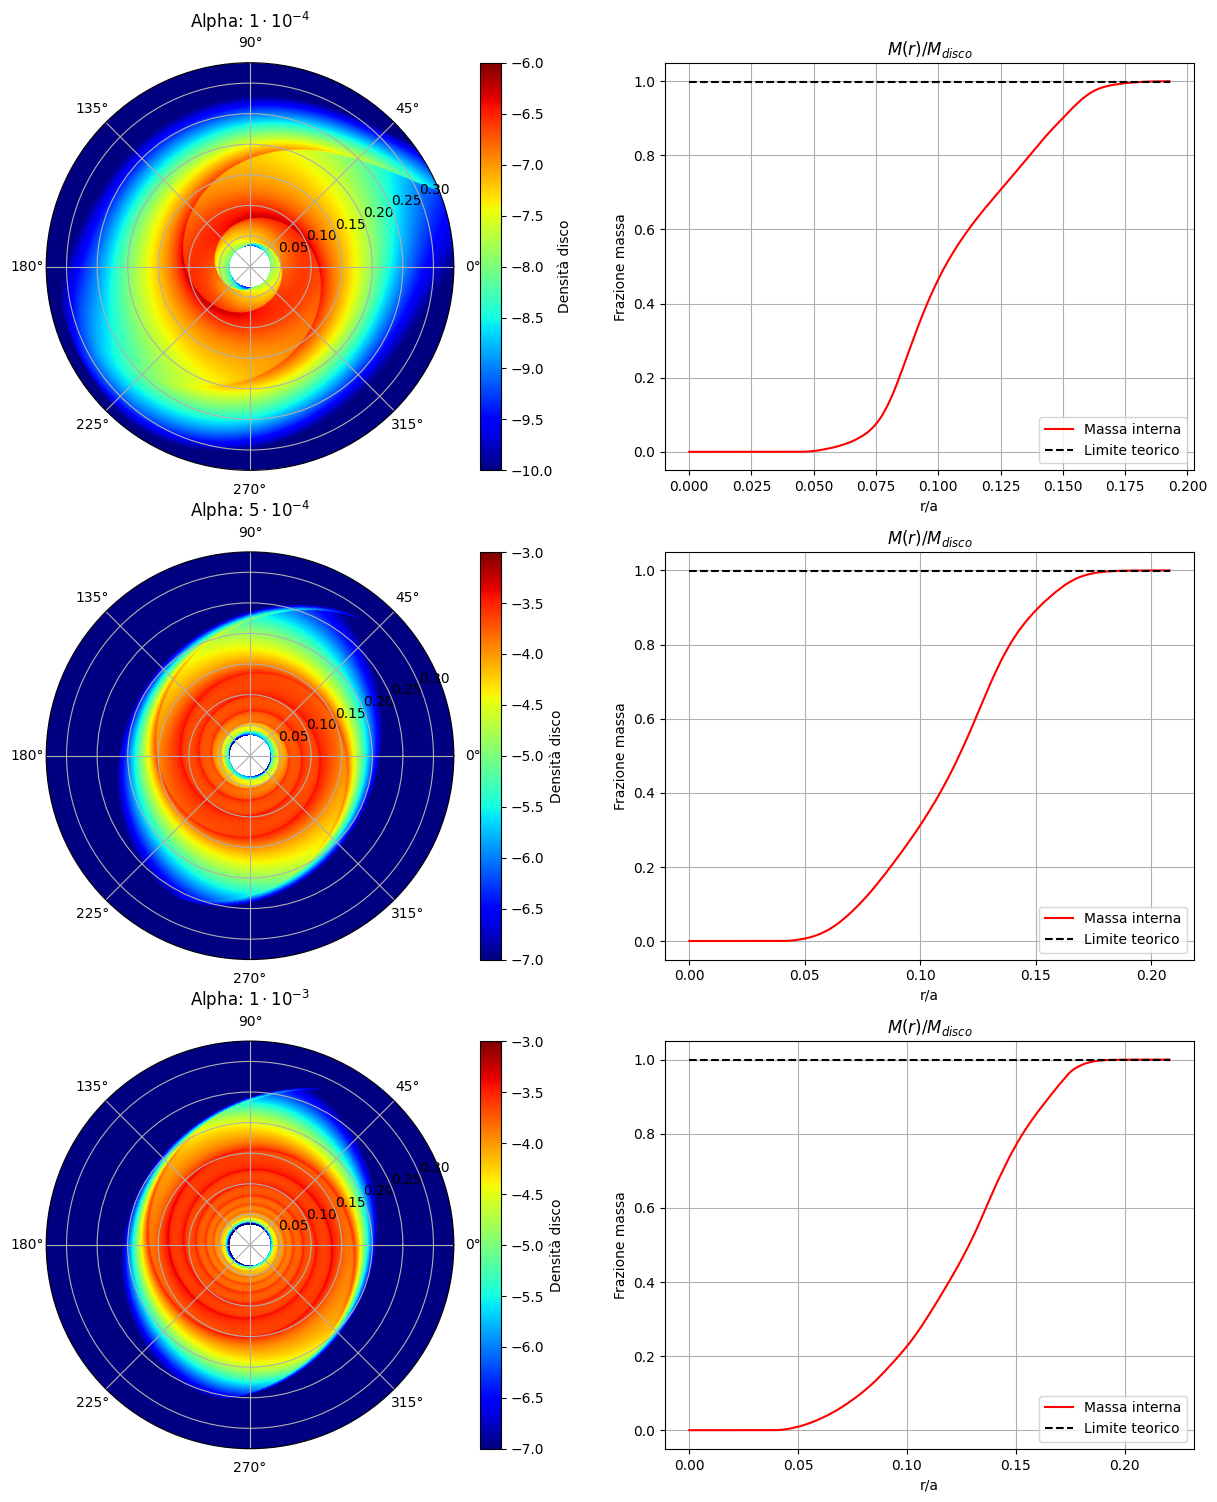

In [4]:
rmin = np.array([0.4, 0.4, 0.4])
rmax = np.array([4.0, 4.0, 4.0])
dist = np.array([12, 12, 12])

cart = np.array(['Al1_4', 'Al5_4', 'Al1_3'])
tit = np.array([r'$1\cdot 10^{-4}$', r'$5\cdot 10^{-4}$', r'$1\cdot 10^{-3}$'])

liminf = np.array([-10, -7, -7])
limsup = np.array([-6, -3, -3])

fig = plt.figure(figsize=(15, 18))

for h in range(0, len(cart)):
    rho = np.fromfile(cart[h] + "/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile(cart[h] + "/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile(cart[h] + "/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    ax = fig.add_subplot(3, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = liminf[h] , vmax = limsup[h])
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(r'Alpha: ' + tit[h])

    ax = fig.add_subplot(3, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Dimensioni dei dischi

In [9]:
rmin = np.array([0.4, 0.4, 0.4])
rmax = np.array([4.0, 4.0, 4.0])
dist = np.array([12, 12, 12])
num = np.array([41, 41, 41])

cart = np.array(['Al1_4', 'Al5_4', 'Al1_3'])
tit = np.array([r'$1\cdot 10^{-4}$', r'$5\cdot 10^{-4}$', r'$1\cdot 10^{-3}$'])

sax_disco = np.zeros(len(cart))

for h in range(0, len(cart)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile(cart[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile(cart[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile(cart[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_disco[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con " + cart[h] + " è: " + str(round(sax_disco[h], 3)) + " a")


Il raggio di troncamento con Al1_4 è: 0.191 a
Il raggio di troncamento con Al5_4 è: 0.187 a
Il raggio di troncamento con Al1_3 è: 0.194 a


### Dipendenza dai parametri

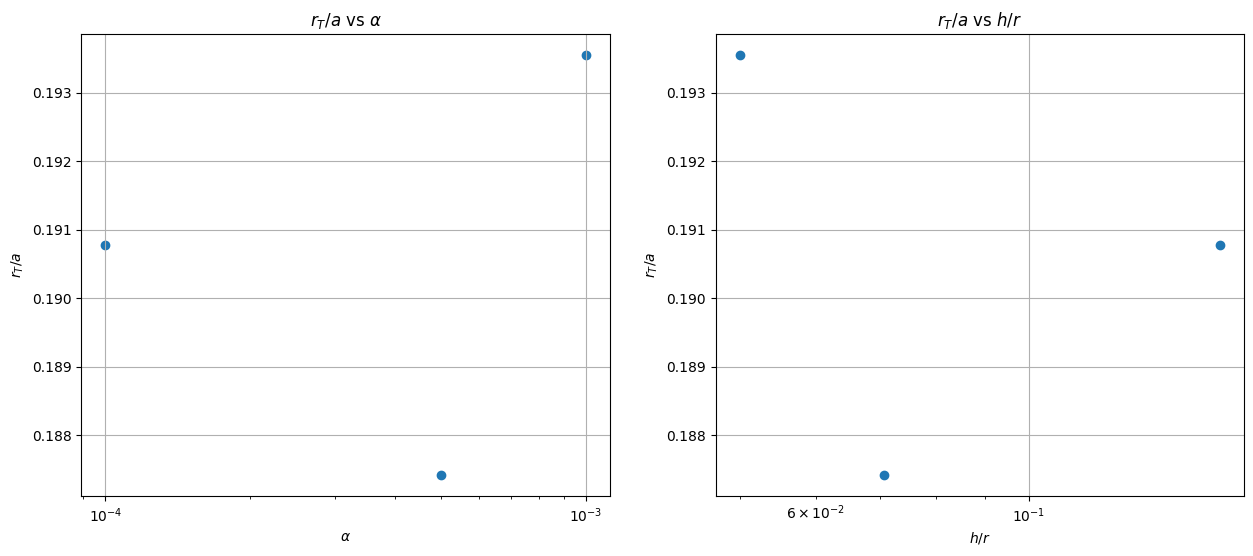

In [10]:
fig = plt.figure(figsize = (15, 6))

ax0 = fig.add_subplot(1, 2, 1)

x = np.array([1e-4, 5e-4, 1e-3])
ax0.scatter(x, sax_disco)
ax0.set_xscale('log')

ax0.set_ylabel(r'$r_T/a$')
ax0.set_xlabel(r'$\alpha$')
ax0.set_title(r'$r_T/a$ vs $\alpha$')
ax0.grid(True)


ax1 = fig.add_subplot(1, 2, 2)

x = np.array([0.15811, 0.07071, 0.05])
ax1.scatter(x, sax_disco)
ax1.set_xscale('log')

ax1.set_ylabel(r'$r_T/a$')
ax1.set_xlabel(r'$h/r$')
ax1.set_title(r'$r_T/a$ vs $h/r$')
ax1.grid(True)




plt.show()

Considero quanto accade valutando entrambi i parametri contemporaneamente.

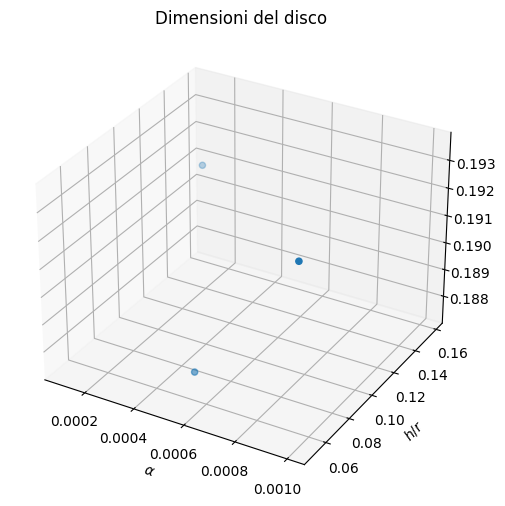

In [11]:
# Dati di esempio
x = np.array([1e-4, 5e-4, 1e-3])
y = np.array([0.15811, 0.07071, 0.05])
Z = sax_disco

# Creazione del grafico
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plottaggio
ax.scatter(x, y, Z)

#Titoli
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$h/r$')
ax.set_title('Dimensioni del disco')

# Mostra il grafico
plt.show()